# Exploratory Data Analysis

## Load the Data

In [36]:
# Import necessary libraries
%matplotlib inline
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from helpers import *
from processing import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load the Data
data_path = "data/dataset/"
x_train, x_test, y_train, train_ids, test_ids = load_csv_data(data_path ,sub_sample=False)

## Data Overview

In [4]:
# View shape of the dataset
x_train.shape, x_test.shape, y_train.shape, train_ids.shape, test_ids.shape

((328135, 321), (109379, 321), (328135,), (328135,), (109379,))

- There are 321 features.
- `x_train` contains the training data and it has 328 135 data entries (before cleaning).
- `x_test` contains the test data and it has 109 379 data entires (before cleaning).
- The `y` vector corresponds to the true values of the output (the variable we wish to predict). The output describes whether a person is diagnosed with MICHD or not. It is binary, -1 or +1, where -1 means no MICHD and +1 means MICHD. There are 328 135 data points (before cleaning).
- `train_ids` and `test_ids` are numpy arrays. Their values correspond to the ids of the data entries of train data and test data, respectively. Therefore, the length of `train_ids` and `test_ids` correspond to the number of data entries for both train and test data, respectively.

In [5]:
# View the few first and last rows of the dataset
print(x_train[:5])  # First 5 elements

[[5.3000000e+01 1.1000000e+01 1.1162015e+07 ...           nan
            nan 2.0000000e+00]
 [3.3000000e+01 1.2000000e+01 1.2152015e+07 ...           nan
            nan           nan]
 [2.0000000e+01 1.0000000e+01 1.0202015e+07 ... 1.0000000e+00
  2.0000000e+00 2.0000000e+00]
 [4.2000000e+01 6.0000000e+00 6.1820150e+06 ... 2.0000000e+00
  2.0000000e+00 2.0000000e+00]
 [2.4000000e+01 1.1000000e+01 1.1062015e+07 ... 9.0000000e+00
  9.0000000e+00 2.0000000e+00]]


In [6]:
print(x_train[-5:])  # Last 5 elements

[[4.9000000e+01 7.0000000e+00 1.1232015e+07 ...           nan
            nan 2.0000000e+00]
 [5.1000000e+01 5.0000000e+00 6.0820150e+06 ...           nan
            nan 1.0000000e+00]
 [3.9000000e+01 1.0000000e+01 1.0202015e+07 ... 2.0000000e+00
  2.0000000e+00 2.0000000e+00]
 [3.3000000e+01 1.2000000e+01 1.2302015e+07 ...           nan
            nan 2.0000000e+00]
 [3.2000000e+01 9.0000000e+00 9.1220150e+06 ...           nan
            nan 2.0000000e+00]]


## Getting Rid of Useless Features

To figure out which features are unimportant, we take a look at the column names of the dataset.

After taking a closer look at the features, we decide to remove the columns as done below. They were removed for either of these reasons:
- The columns were not relevant to the goal of our project (e.g. State, Income, etc.)
- The columns represented questions about a specific subject that were later regrouped into a single feature (e.g. for Cholesterol, many questions were asked to the participants. One final feature summarized the findings. We only keep this final feature.)
- The columns had too many null values, becoming irrelevant. For this, we define a threshold of 70% of null values. If a column has more than 70% of null values, we remove it.

In [7]:
x_train_new = x_train.copy()

# We define manually all columns we want to remove
columns_to_remove_train = set()
columns_to_remove_train.update(range(50))         
columns_to_remove_train.update(range(1, 14))      
columns_to_remove_train.update(range(2, 44))      
columns_to_remove_train.update(range(13, 37))     
columns_to_remove_train.update(range(16, 37))     
columns_to_remove_train.update(range(42, 56))     
columns_to_remove_train.update(range(52, 66))     
columns_to_remove_train.update([78, 79, 80])      
columns_to_remove_train.update([72])             # remove height in inches to only keep height in meters

columns_to_remove_train = sorted(columns_to_remove_train)
 
x_train_new = np.delete(x_train_new, columns_to_remove_train, axis=1)

print(f"Shape of the new training set: {x_train_new.shape}")

Shape of the new training set: (328135, 251)


In [42]:
x_test_new = x_test.copy()

# We define manually all columns we want to remove
columns_to_remove_test = set()
columns_to_remove_test.update(range(50))         
columns_to_remove_test.update(range(1, 14))      
columns_to_remove_test.update(range(2, 44))      
columns_to_remove_test.update(range(13, 37))     
columns_to_remove_test.update(range(16, 37))     
columns_to_remove_test.update(range(42, 56))     
columns_to_remove_test.update(range(52, 66))     
columns_to_remove_test.update([78, 79, 80])      
columns_to_remove_test.update([72])             # remove height in inches to only keep height in meters

columns_to_remove_test = sorted(columns_to_remove_test)
 
x_test_new = np.delete(x_test_new, columns_to_remove_test, axis=1)

print(f"Shape of the new test set: {x_test_new.shape}")

Shape of the new test set: (109379, 251)


## Missing Values

In [43]:
# removing columns with more than 70% of NaN values
x_train_clean = x_train_new.copy()
x_train_clean, columns_to_remove_train = remove_nan(x_train_clean, 0.70)
print(f"Shape of the new training set: {x_train_clean.shape}")

Shape of the new training set: (328135, 137)


In [46]:
# removing columns with more than 70% of NaN values
x_test_clean = x_test_new.copy()
x_test_clean, columns_to_remove_test = remove_nan(x_test_clean, 0.70)
print(f"Shape of the new test set: {x_test_clean.shape}")

Shape of the new test set: (109379, 137)


This leaves us with 137 features. **we don't have the ID of the remaining features so we cannot look at them one by one**.

## Correlation

Variables that are highly correlated (e.g., above 75%) might be redundant and can be removed: for each pair of highly correlated variables, we remove one of them.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


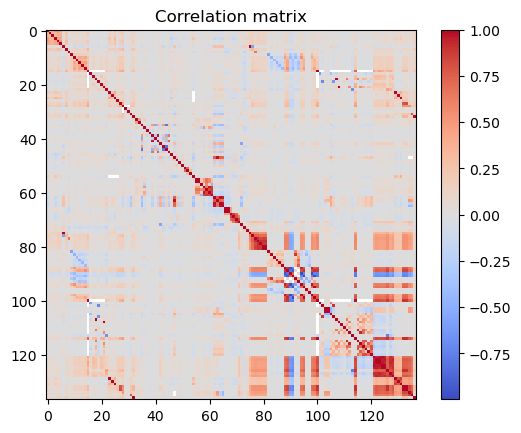

In [49]:
correlation_matrix = compute_corr(x_train_clean)
plot_corr_matrix(correlation_matrix)

In [50]:
filtered_train, kept_features = remove_correlated_features(x_train_clean, correlation_matrix, 0.75)
print(f"Shape of the new training set: {filtered_train.shape}")

Shape of the new training set: (328135, 89)


In [51]:
filtered_test = x_test_clean[:, kept_features]
print(f"Shape of the new test set: {filtered_test.shape}")

Shape of the new test set: (109379, 89)
